In [1]:
import time
start_time=time.time()

Abstract

Se presenta el análisis estadístico aplicado a la linea de Halfa para NGC 604. Se realizan y comparan 6 muestras. Las muestra orginal i, las muestras ii y iii que corresponde a regiones de menor tamaño y número de puntos. Cada muestra de velocidad se corrige con un ajuste polnomial.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from SBRF import sosf,acf,ps,sosfnorm,sosfw,sosfw2,sosfs,sosfnorms,sfwh,pst
import os
import itertools


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

Input Data

In [3]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB


Astronomical Observations

In [4]:
inputf='604.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})


In [5]:
#LimitData
min0=65
max0=145
mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

Emission lines data

In [6]:
for i in range(1):
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lr[Nx]))+'.csv')

# Muestra (i)

In [7]:
datap='dataI6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-250.043594,2277.239467
std,23.243169,6.256047,10.420092,3750.107456
min,65.710000,0.000000,-277.593319,27.150000
25%,85.485000,4.000000,-257.836471,281.925000
50%,105.270000,9.000000,-249.888052,1017.500000
75%,125.045000,15.000000,-244.018098,2403.500000
max,144.830000,19.600000,-205.463695,30960.000000


Statistical Data

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


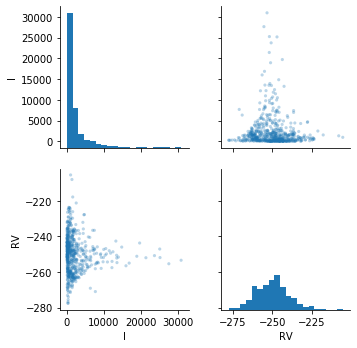

In [8]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


Emission Map

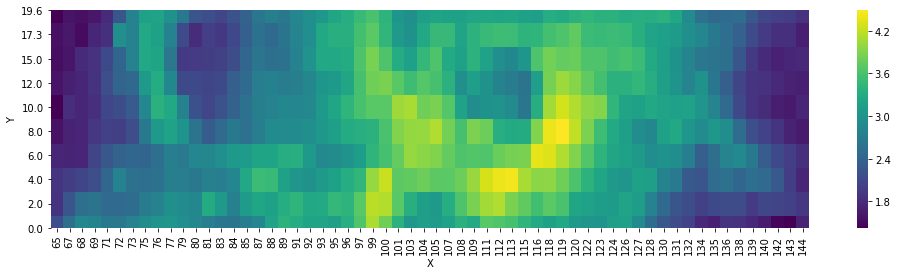

In [9]:
datal=dt.copy()
datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
#datal.Y=datal.Y.astype(int)

dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="viridis",xticklabels='auto')
plt.gca().invert_yaxis()
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="16"

Radial Velocity

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


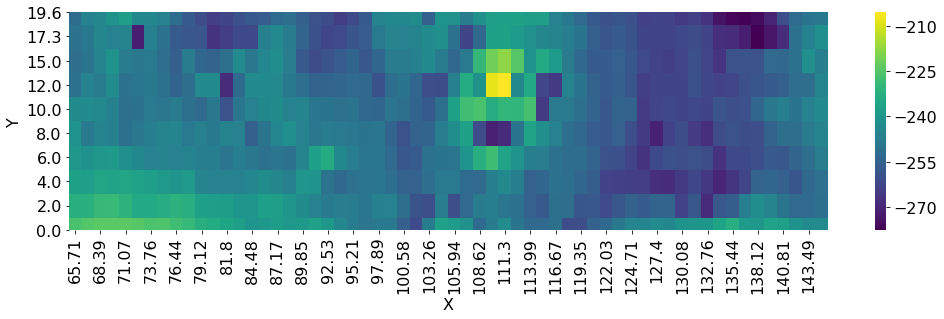

In [10]:
datal=dt.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

Weighted property

In [11]:
W=np.log(abs((dt.RV*dt.I)/dt.I.sum()))
W.head()

0   -4.307465
1   -4.062174
2   -3.976022
3   -3.793160
4   -3.335217
dtype: float64

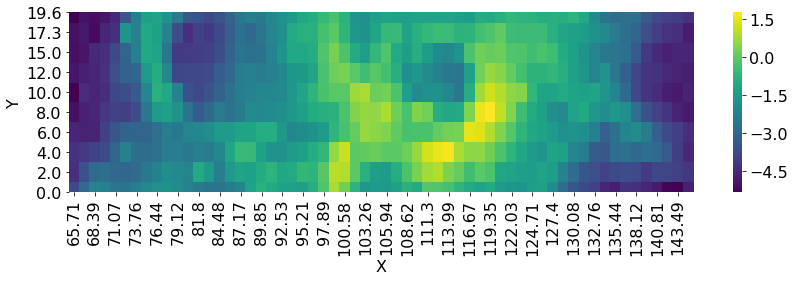

In [12]:
dtW=[dt.X,dt.Y,W]
dtW=pd.DataFrame(dtW).T
dtW.columns=['X','Y','W']

dtH_W=(dtW.round(2)).pivot(index='Y', columns='X', values='W')
fig, ax = plt.subplots(figsize=(14, 3.3))
sns.heatmap(dtH_W, cmap="viridis")
plt.gca().invert_yaxis()


Statistical Analysis SBR

/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SBR.Final/SBRF.py:242: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SBR.Final/SBRF.py:251: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SBR.Final/SBRF.py:687: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SBR.Final/SBRF.py:696: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud/codepycloud/PhD.Final/SBR.Final

Dotted line is 2 x sigma^2 = 216.79


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


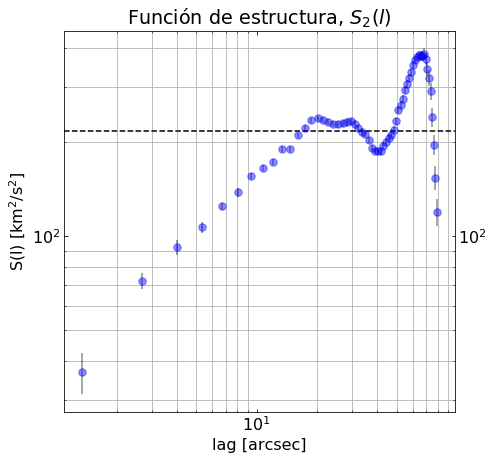

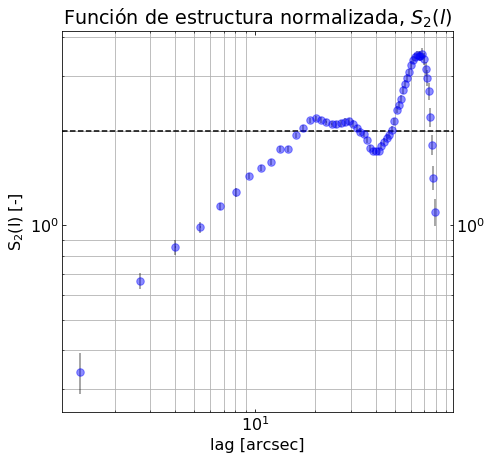

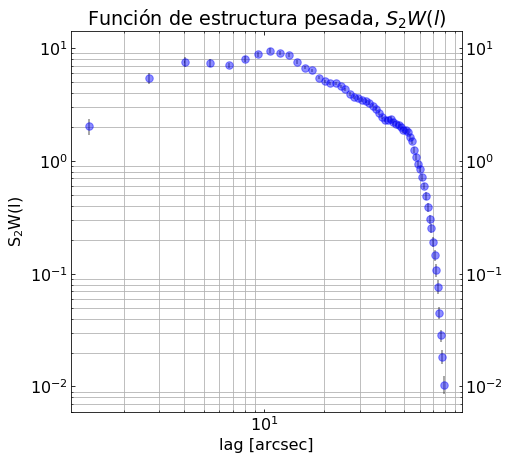

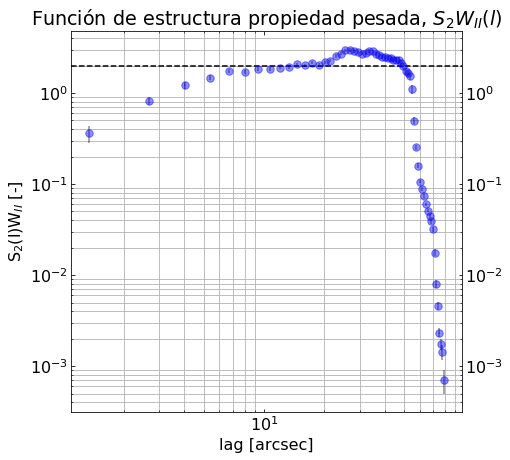

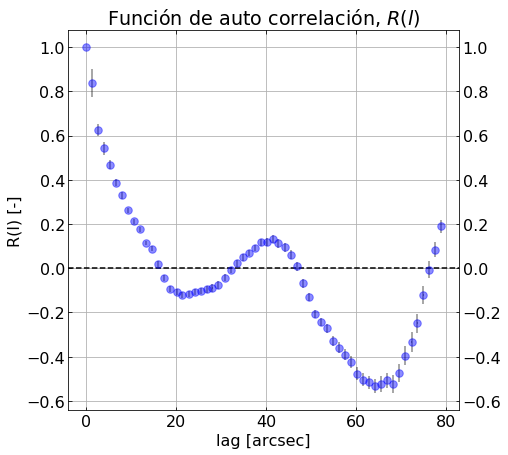

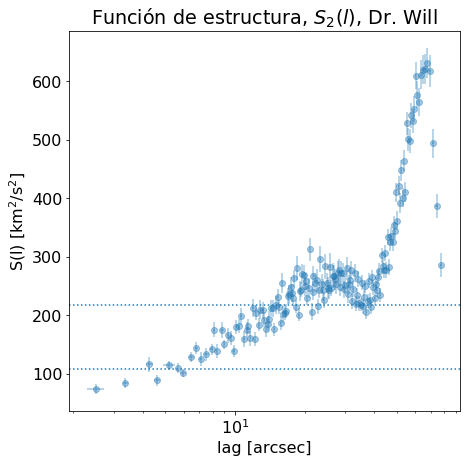

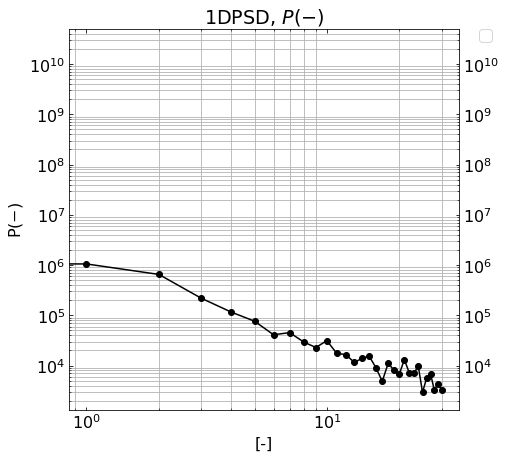

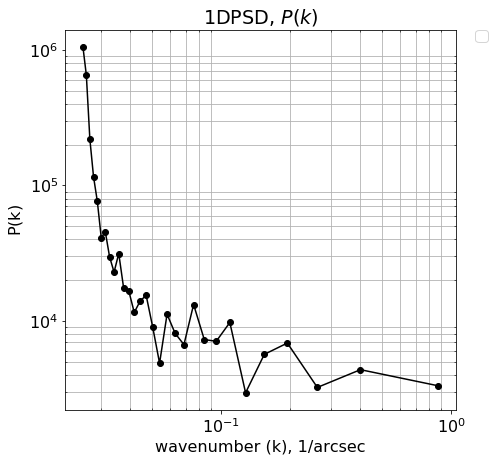

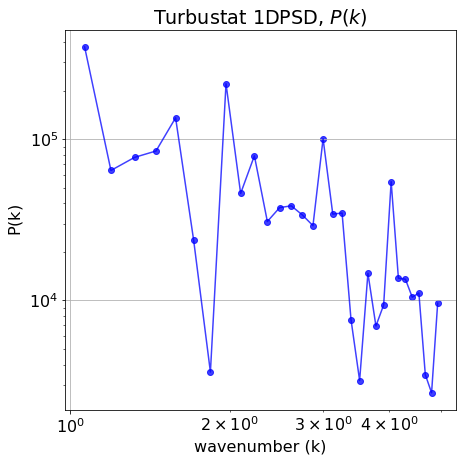

In [13]:

sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
sfwH00=sosfw(dt)
sfw2H00=sosfw2(dt)
afH00=acf(dt)
sfhH00=sfwh(dt)
psH00=ps(dt)
pstH00=pst(dt)


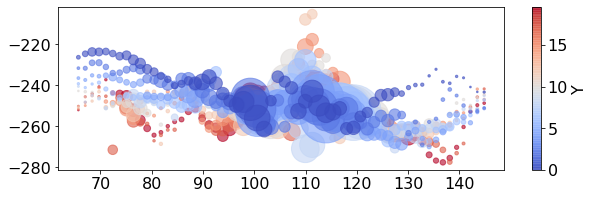

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Y")

 
-250
 
-0.1871 x - 230.4
           2
0.0005181 x - 0.2961 x - 224.9
           3           2
4.633e-05 x - 0.01411 x + 1.199 x - 274.2
           4            3         2
1.594e-05 x - 0.006664 x + 1.023 x - 68.51 x + 1442
           5             4           3         2
5.687e-07 x - 0.0002834 x + 0.05534 x - 5.289 x + 247.1 x - 4757


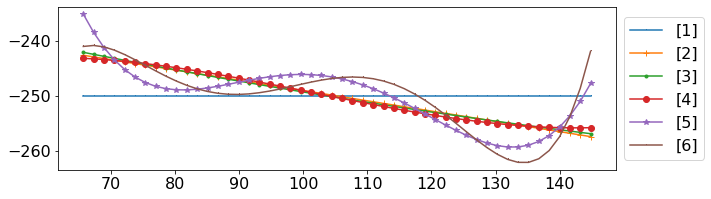

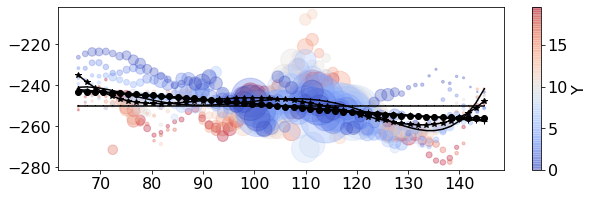

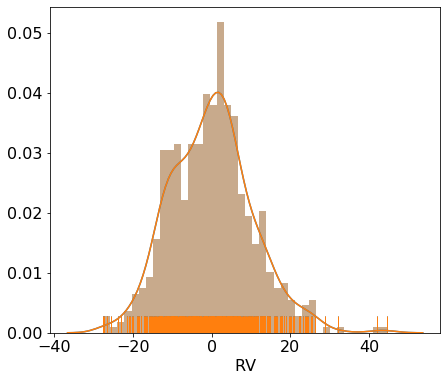

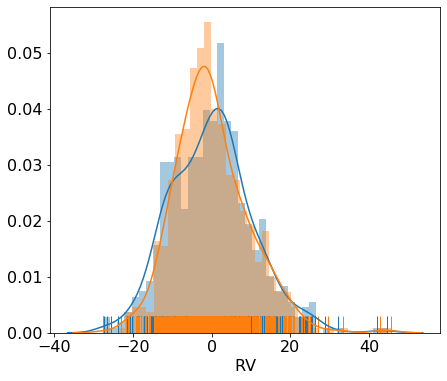

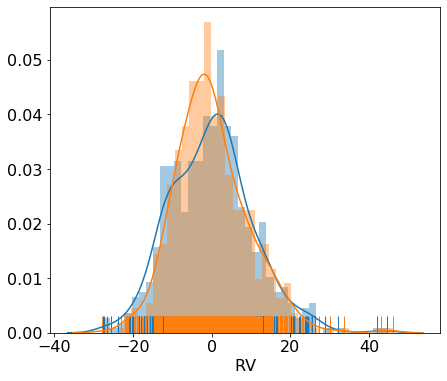

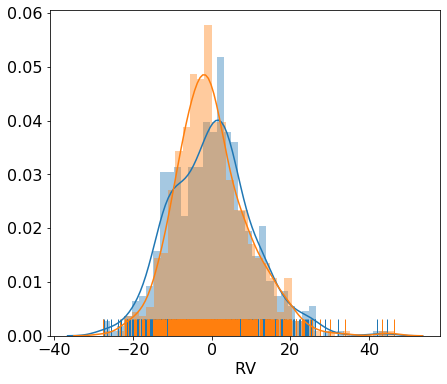

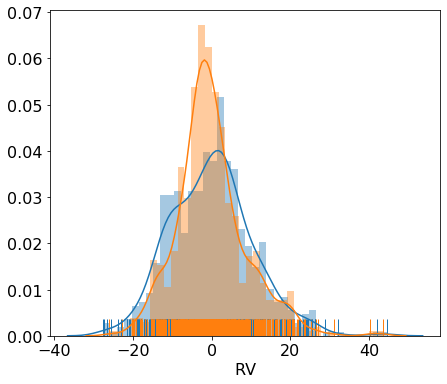

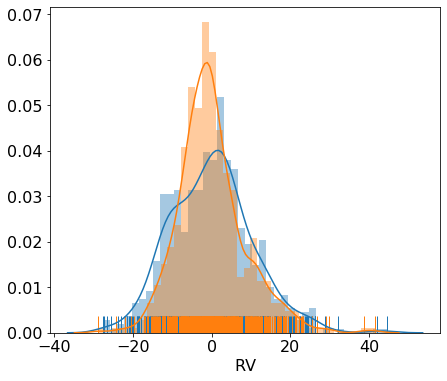

In [34]:

marker=itertools.cycle((',','+','.','o','*'))

X=dict()
Y=dict()
XY=dict()

n=6

for i in range(n):
    X[i] = np.poly1d(np.polyfit(dt.X, dt.RV, i))

fig, ax = plt.subplots(figsize=(10, 3))
RAgrid = np.linspace(dt.X.min(), dt.X.max())

for i in range(n):
    ax.plot(RAgrid, X[i](RAgrid), label=[i+1], marker=next(marker))
    
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Y")

marker=itertools.cycle((',','+','.','o','*'))


for i in range(n):
    ax.plot(RAgrid, X[i](RAgrid), label=[i+1], marker=next(marker), c="k")

for i in range(n):
    Y[i]=dt.RV-X[i](dt.X)

for i in range(n):
    fig, ax=plt.subplots(figsize=(7,6))
    hist=dt.RV-dt.RV.mean()
    sns.distplot(hist,bins=40,rug=True)
    sns.distplot(Y[i],bins=40,rug=True)

XY=dict()

for i in range(n):
    XY[i]= pd.DataFrame({'X': dt.X, 'Y': dt.Y, 'RV':Y[i], 'I':dt.I})

for i in range(n):
    print(X[i])

In [35]:
#sfH00c=sosf(dtc)
#sfnH00c=sosfnorm(dtc)
#sfwH00c=sosfw(dtc)
#sfw2H00c=sosfw2(dtc)
#sfhH00c=sfwh(dtc)
#afH00c=acf(dtc)
#psH00c=ps(dtc)
#pstH00c=pst(dtc)


#muestra(ii)

In [25]:
#mr=(dt.X<130)&(dt.X>85)
#dt1=dt[mr]
#dt1.describe()

In [26]:
#sns.pairplot(dt1, 
#             vars=["I","RV"], 
#             diag_kind='hist',  
#             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
#             diag_kws=dict(bins=20),
#            )

In [27]:
#datal=dt1.copy()
#datal.I=np.log10(datal.I)
#dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
#fig, ax = plt.subplots(figsize=(12, 4))
#sns.heatmap(dataH_f, cmap="viridis")
#plt.gca().invert_yaxis()

In [28]:
#datal=dt1.copy()
#dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
#fig, ax = plt.subplots(figsize=(12, 4))
#sns.heatmap(dataH_rv, cmap="viridis")
#plt.gca().invert_yaxis()

In [29]:
#sfH01=sosfs(dt1)
#sfnH01=sosfnorms(dt1)
#sfwH01=sosfw(dt1)
#sfw2H01=sosfw2(dt1)
#sfhH01=sfwh(dt1)
#afH01=acf(dt1)
#psH01=ps(dt1)
#pstH01=pst(dt1)


In [ ]:
print("--- %s seconds ---" % (time.time()-start_time))

In [ ]:
#psH00.to_csv('datax.csv')